In [8]:
import seaborn as sns

df = sns.load_dataset("tips")

1.
df.info()
df.describe()
df.isna().sum() #brakujące wartosci

2.
grouped = df.groupby(["day","sex"], observed=True).agg({"total_bill":"mean" , "tip":"mean"})
print(grouped)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
             total_bill       tip
day  sex                         
Thur Male     18.714667  2.980333
     Female   16.715312  2.575625
Fri  Male     19.857000  2.693000
     Female   14.145556  2.781111
Sat  Male     20.802542  3.083898
     Female   19.680357  2.801786
Sun  Male     21.887241  3.220345
     Female   19.872222  3.367222


In [12]:
3.
df["tip_rate"] = (df["tip"] / df["total_bill"] * 100)
print(df.iloc[1])
print(df)
tips_rate_by_day_time = df.groupby(["day","time"], observed=True).agg({"tip_rate":"mean"})
print(tips_rate_by_day_time)

total_bill        10.34
tip                1.66
sex                Male
smoker               No
day                 Sun
time             Dinner
size                  3
tip_rate      16.054159
Name: 1, dtype: object
     total_bill   tip     sex smoker   day    time  size   tip_rate
0         16.99  1.01  Female     No   Sun  Dinner     2   5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3  16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3  16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2  13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4  14.680765
..          ...   ...     ...    ...   ...     ...   ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3  20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2   7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2   8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2   9.820426
243       18.78  3.00  Female     No 

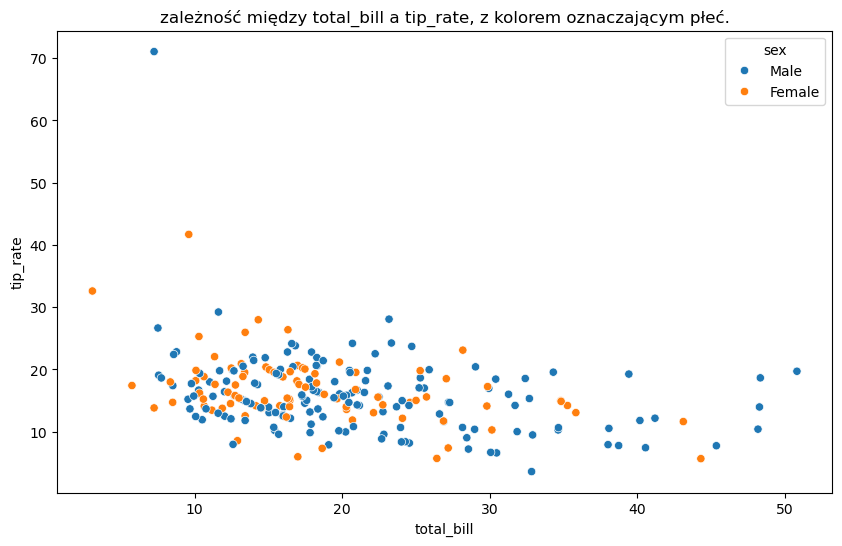

In [13]:
4.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="total_bill",y="tip_rate",hue="sex")
plt.title("zależność między total_bill a tip_rate, z kolorem oznaczającym płeć.")
plt.show()

In [23]:
weekend_tips = df[df["day"].isin(["Sat","Sun"])]["tip_rate"].mean()
print(f"{weekend_tips}")
workday_tips = df[df["day"].isin(["Thur","Fri"])]["tip_rate"].mean()
print(f"{workday_tips}")

print("\n")

gender_tips = df.groupby("sex", observed=True).agg({"tip_rate":"mean"})
print(gender_tips)

15.95606937940057
16.330168952923728


         tip_rate
sex              
Male    15.765055
Female  16.649074


In [24]:
#Ilość napiwków nie różni się zacznie w zależności od weekendow , kobiety płacą wyższe napiwki od mężczyzn